In [1]:
import pandas as pd
import numpy as np
from src import pre_process
from src import denseNet2
from PIL import Image
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = 3000000000 

train1 = pd.read_csv("../Final-IRONHACK-Project/data/train1.csv")
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(train1)

train_generator, validation_generator = pre_process.image_generator()




Found 14 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [2]:
# Assuming you have already defined train_generator, validation_generator, and x_train
# and imported the necessary libraries.

# Import YourDenseNetModel class from your module

# Instantiate YourDenseNetModel
dense_net_model = denseNet2.YourDenseNetModel()

# Set generators
dense_net_model.set_generators(train_generator, validation_generator)

# Train the model
history = dense_net_model.train(train_x, epochs=1, batch_size=5)

# Get and save the weights
dense_net_model.get_weights()






121/121 [==============================] - 163s 1s/step - loss: 1.6433 - accuracy: 0.4286 - val_loss: 0.8536 - val_accuracy: 0.4000 - lr: 0.0010


2/2 [==============================] - 42s 25s/step - loss: 0.7787 - accuracy: 0.5000
Evaluation Result: [0.7787443995475769, 0.5]
1/1 [==============================] - 0s 100ms/step


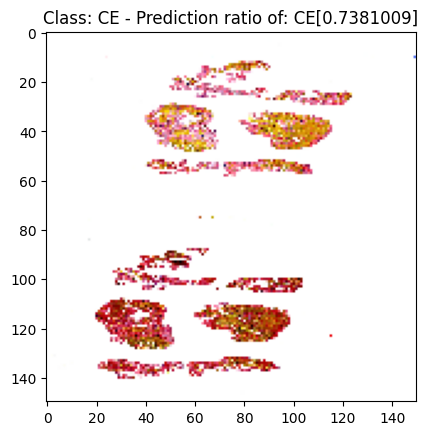

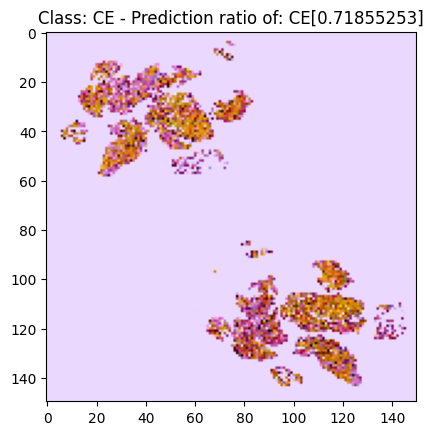

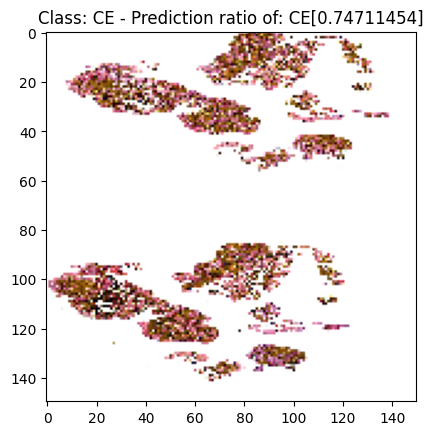

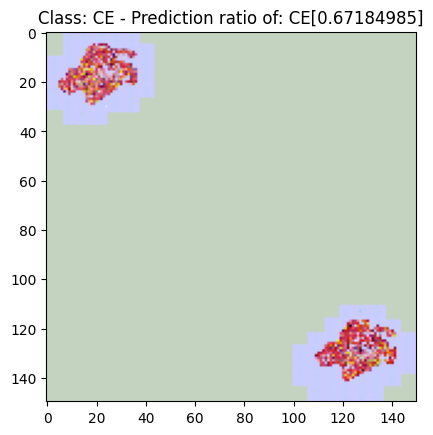

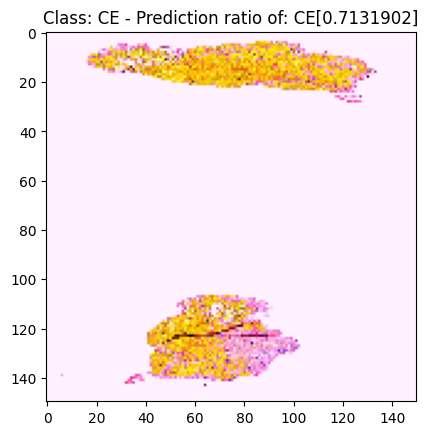

In [3]:
# Evaluate the model
batch_size = 5
evaluation_result = dense_net_model.evaluation(batch_size)
print("Evaluation Result:", evaluation_result)


# Predict using the trained model
class_names = ["CE", "LAA"]
dense_net_model.predict_densenet(class_names)

`Predict on new images:`

In [6]:
dense_model_test = denseNet2.YourDenseNetModel()
dense_model_test.load_weights('data/Dense_weights.h5')

AttributeError: 'YourDenseNetModel' object has no attribute 'load_weights'

In [4]:
new_images_folder_dense = 'D:/bootcamp/test'
dense_generator = dense_model_test.load_and_preprocess_images('densenet', new_images_folder_dense)

In [ ]:
predictions_dense = dense_model_test.predict(dense_generator)

In [ ]:
dense_predicted_classes = np.argmax(predictions_dense, axis=1)
print("DenseNet Predictions:", dense_predicted_classes)

In [ ]:
# Visualize DenseNet predictions
for i in range(len(dense_generator)):
    plt.imshow(dense_generator[i])
    plt.title(f'DenseNet Prediction: {predictions_dense[i]}')
    plt.show()